In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define Grid World environment
class GridWorld:
    def __init__(self, size=5, goal=(4, 4), obstacles=[(2, 2), (3, 3)]):
        self.size = size
        self.goal = goal
        self.obstacles = obstacles
        self.state = (0, 0)  # Start at top-left
    
    def reset(self):
        self.state = (0, 0)
        return self.state
    
    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 2:  # Left
            y = max(0, y - 1)
        elif action == 3:  # Right
            y = min(self.size - 1, y + 1)
        
        next_state = (x, y)
        reward = -1  # Small penalty for each step
        done = False
        
        if next_state in self.obstacles:
            reward = -5  # Penalty for obstacles
            next_state = self.state  # Stay in place
        elif next_state == self.goal:
            reward = 10  # Reward for reaching goal
            done = True
        
        self.state = next_state
        return next_state, reward, done
    
    def render(self):
        grid = np.zeros((self.size, self.size))
        for obs in self.obstacles:
            grid[obs] = -1  # Mark obstacles
        grid[self.goal] = 2  # Mark goal
        grid[self.state] = 1  # Mark agent position
        print(grid)

# Q-learning Algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # Q-table
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)  # Explore
            else:
                action = np.argmax(Q[state[0], state[1]])  # Exploit
            
            next_state, reward, done = env.step(action)
            
            # Q-update
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
    
    return Q

# Train the agent
env = GridWorld()
Q_table = q_learning(env)

def get_optimal_policy(Q):
    policy = np.argmax(Q, axis=2)
    symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    return np.vectorize(symbols.get)(policy)

# Print Optimal Policy
optimal_policy = get_optimal_policy(Q_table)
print("Optimal Policy:")
print(optimal_policy)

Optimal Policy:
[['↓' '↓' '→' '↓' '↓']
 ['→' '↓' '→' '→' '↓']
 ['↓' '↓' '↑' '→' '↓']
 ['→' '↓' '↓' '↑' '↓']
 ['→' '→' '→' '→' '↑']]


Optimal Policy:
[['↓' '→' '↓' '↓' '↓']
 ['→' '→' '→' '→' '↓']
 ['↓' '↓' '↑' '→' '↓']
 ['→' '↓' '↓' '↑' '↓']
 ['→' '→' '→' '→' '↑']]


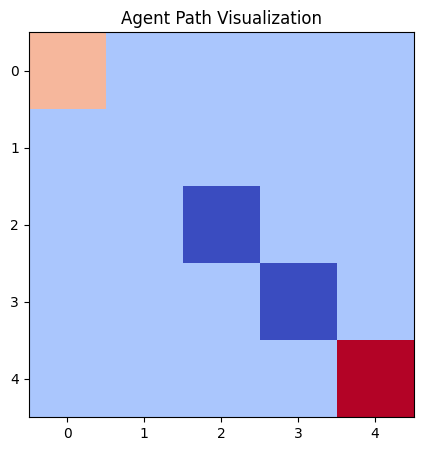

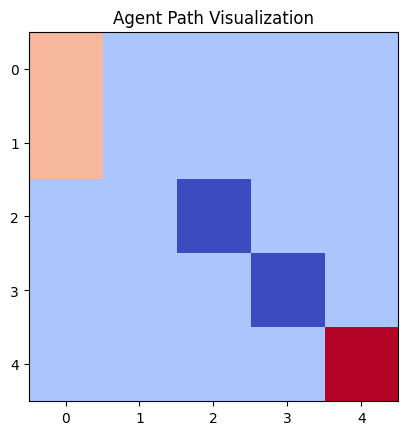

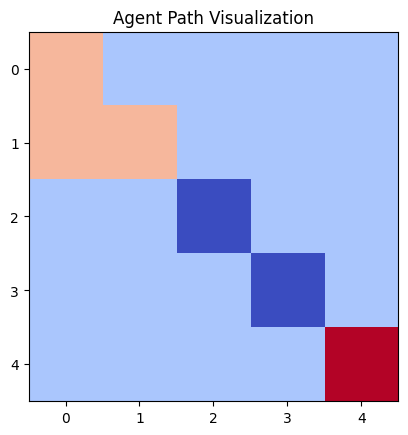

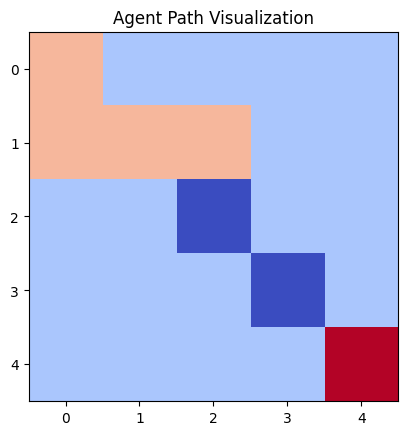

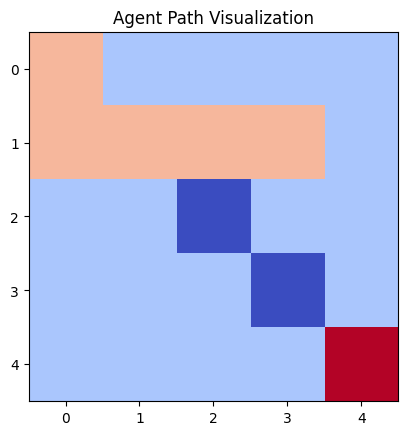

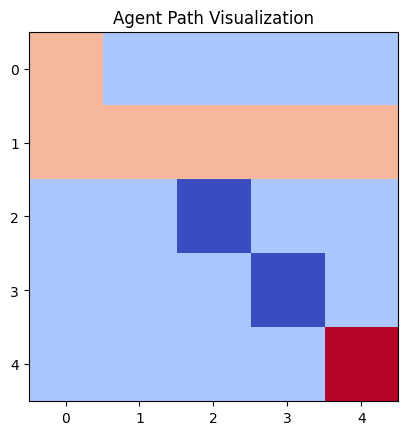

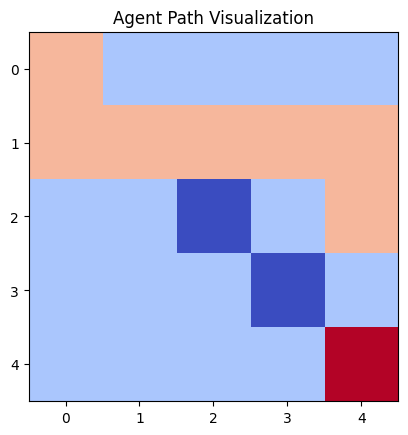

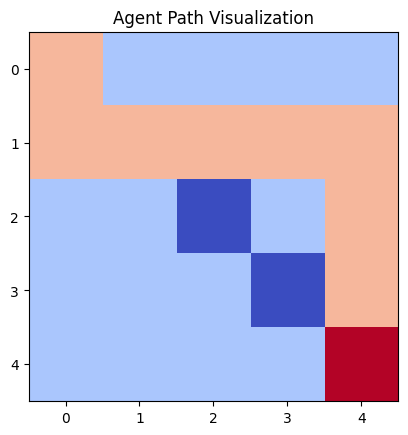

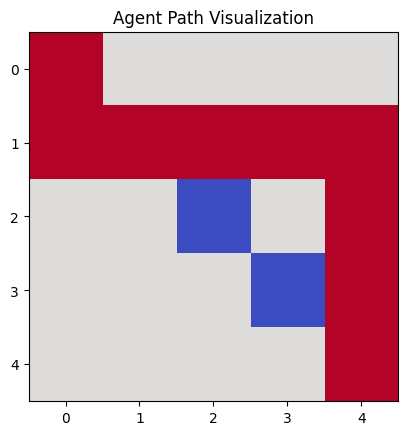

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Define Grid World environment
class GridWorld:
    def __init__(self, size=5, goal=(4, 4), obstacles=[(2, 2), (3, 3)]):
        self.size = size
        self.goal = goal
        self.obstacles = obstacles
        self.state = (0, 0)  # Start at top-left
    
    def reset(self):
        self.state = (0, 0)
        return self.state
    
    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 2:  # Left
            y = max(0, y - 1)
        elif action == 3:  # Right
            y = min(self.size - 1, y + 1)
        
        next_state = (x, y)
        reward = -1  # Small penalty for each step
        done = False
        
        if next_state in self.obstacles:
            reward = -5  # Penalty for obstacles
            next_state = self.state  # Stay in place
        elif next_state == self.goal:
            reward = 10  # Reward for reaching goal
            done = True
        
        self.state = next_state
        return next_state, reward, done
    
    def render(self):
        grid = np.zeros((self.size, self.size))
        for obs in self.obstacles:
            grid[obs] = -1  # Mark obstacles
        grid[self.goal] = 2  # Mark goal
        grid[self.state] = 1  # Mark agent position
        print(grid)

# Q-learning Algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # Q-table
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)  # Explore
            else:
                action = np.argmax(Q[state[0], state[1]])  # Exploit
            
            next_state, reward, done = env.step(action)
            
            # Q-update
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
    
    return Q

# Train the agent
env = GridWorld()
Q_table = q_learning(env)

def get_optimal_policy(Q):
    policy = np.argmax(Q, axis=2)
    symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    return np.vectorize(symbols.get)(policy)

# Print Optimal Policy
optimal_policy = get_optimal_policy(Q_table)
print("Optimal Policy:")
print(optimal_policy)

# Visualization Function
def visualize_path(env, Q):
    state = env.reset()
    path = [state]
    done = False
    
    while not done:
        action = np.argmax(Q[state[0], state[1]])
        state, _, done = env.step(action)
        path.append(state)
    
    grid = np.zeros((env.size, env.size))
    for obs in env.obstacles:
        grid[obs] = -1  # Obstacles
    grid[env.goal] = 2  # Goal
    
    plt.figure(figsize=(5,5))
    for i, (x, y) in enumerate(path):
        grid[x, y] = 1  # Path trace
        plt.imshow(grid, cmap="coolwarm", origin="upper")
        plt.title("Agent Path Visualization")
        plt.pause(0.5)
    plt.show()

# Run Visualization
visualize_path(env, Q_table)


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from collections import deque

# Define Grid World environment
class GridWorld:
    def __init__(self, size=5, goal=(4, 4), obstacles=[(2, 2), (3, 3)]):
        self.size = size
        self.goal = goal
        self.obstacles = obstacles
        self.state = (0, 0)  # Start at top-left
    
    def reset(self):
        self.state = (0, 0)
        return self.state
    
    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 2:  # Left
            y = max(0, y - 1)
        elif action == 3:  # Right
            y = min(self.size - 1, y + 1)
        
        next_state = (x, y)
        reward = -1  # Small penalty for each step
        done = False
        
        if next_state in self.obstacles:
            reward = -5  # Penalty for obstacles
            next_state = self.state  # Stay in place
        elif next_state == self.goal:
            reward = 10  # Reward for reaching goal
            done = True
        
        self.state = next_state
        return next_state, reward, done
    
    def render(self):
        grid = np.zeros((self.size, self.size))
        for obs in self.obstacles:
            grid[obs] = -1  # Mark obstacles
        grid[self.goal] = 2  # Mark goal
        grid[self.state] = 1  # Mark agent position
        print(grid)

# Q-learning Algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # Q-table
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)  # Explore
            else:
                action = np.argmax(Q[state[0], state[1]])  # Exploit
            
            next_state, reward, done = env.step(action)
            
            # Q-update
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
    
    return Q

# Deep Q-Network (DQN) Implementation
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
    
    def _build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, input_dim=self.state_size, activation='relu'),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = np.reshape(state, [1, self.state_size])
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])
    
    def replay(self, batch_size=32):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = np.reshape(next_state, [1, self.state_size])
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            state = np.reshape(state, [1, self.state_size])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    
# Train DQN Agent
def train_dqn(env, episodes=500):
    agent = DQNAgent(state_size=2, action_size=4)
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        
        if len(agent.memory) > 32:
            agent.replay()
        
        if episode < 501:
            print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {agent.epsilon}")
    
    return agent

# Train the agents
env = GridWorld()
Q_table = q_learning(env)
DQN_agent = train_dqn(env)

# Function to get the optimal policy from Q-table
def get_optimal_policy(Q, env):
    policy = np.full((Q.shape[0], Q.shape[1]), '', dtype='<U1')
    actions = ['↑', '↓', '←', '→']
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            if (i, j) in env.obstacles:
                policy[i, j] = 'X'
            elif (i, j) == env.goal:
                policy[i, j] = 'G'
            else:
                policy[i, j] = actions[np.argmax(Q[i, j])]
    return policy

# Compare Q-learning and DQN
def compare_methods(env, Q, DQN_agent):
    print("\nQ-learning Optimal Policy:")
    print(get_optimal_policy(Q, env))
    print("\nDQN Test Run:")
    state = env.reset()
    done = False
    path = [state]
    
    while not done:
        action = DQN_agent.act(state)
        state, _, done = env.step(action)
        path.append(state)
    print("DQN Path Taken:", path)

compare_methods(env, Q_table, DQN_agent)

Episode 0, Total Reward: -92, Epsilon: 0.995
Episode 1, Total Reward: -243, Epsilon: 0.990025


KeyboardInterrupt: 

2025-03-27 01:20:44.780685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-27 01:20:44.982713: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 01:20:45.012002: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-27 01:20:45.012031: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

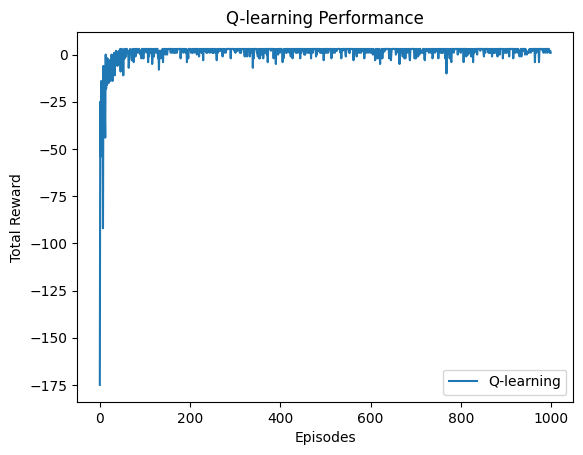

2025-03-27 01:20:46.800966: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-27 01:20:46.800988: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Dell-G15): /proc/driver/nvidia/version does not exist
2025-03-27 01:20:46.801666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from collections import deque

# Define Grid World environment
class GridWorld:
    def __init__(self, size=5, goal=(4, 4), obstacles=[(2, 2), (3, 3)]):
        self.size = size
        self.goal = goal
        self.obstacles = obstacles
        self.state = (0, 0)  # Start at top-left
    
    def reset(self):
        self.state = (0, 0)
        return self.state
    
    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 2:  # Left
            y = max(0, y - 1)
        elif action == 3:  # Right
            y = min(self.size - 1, y + 1)
        
        next_state = (x, y)
        reward = -1  # Small penalty for each step
        done = False
        
        if next_state in self.obstacles:
            reward = -5  # Penalty for obstacles
            next_state = self.state  # Stay in place
        elif next_state == self.goal:
            reward = 10  # Reward for reaching goal
            done = True
        
        self.state = next_state
        return next_state, reward, done
    
# Q-learning Algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # Q-table
    
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)  # Explore
            else:
                action = np.argmax(Q[state[0], state[1]])  # Exploit
            
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            # Q-update
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
        rewards.append(total_reward)
    
    return Q, rewards

# Train the agents
env = GridWorld()
Q_table, q_rewards = q_learning(env)

# Plot Q-learning rewards
plt.plot(q_rewards, label="Q-learning")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-learning Performance")
plt.legend()
plt.show()

# Deep Q-Network (DQN) Implementation
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
    
    def _build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, input_dim=self.state_size, activation='relu'),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = np.reshape(state, [1, self.state_size])
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])
    
    def replay(self, batch_size=32):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = np.reshape(next_state, [1, self.state_size])
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            state = np.reshape(state, [1, self.state_size])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Train DQN Agent
def train_dqn(env, episodes=500):
    agent = DQNAgent(state_size=2, action_size=4)
    dqn_rewards = []
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        
        dqn_rewards.append(total_reward)
        
        if len(agent.memory) > 32:
            agent.replay()
    
    return agent, dqn_rewards

DQN_agent, dqn_rewards = train_dqn(env)

# Plot DQN performance
plt.plot(dqn_rewards, label="DQN")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("DQN Performance")
plt.legend()
plt.show()

# Compare Q-learning and DQN
plt.plot(q_rewards, label="Q-learning")
plt.plot(dqn_rewards, label="DQN")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Comparison of Q-learning and DQN")
plt.legend()
plt.show()
